<a href="https://colab.research.google.com/github/agungtriu/Belajar-Pengembangan-Machine-Learning/blob/master/Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menggunakan Model untuk Melakukan Prediksi

In [100]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [101]:
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [102]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [103]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [104]:
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 1ms/step - loss: 221.1182
Epoch 2/150
1/1 [==============================] - 0s 1ms/step - loss: 102.4760
Epoch 3/150
1/1 [==============================] - 0s 4ms/step - loss: 47.5639
Epoch 4/150
1/1 [==============================] - 0s 2ms/step - loss: 22.1479
Epoch 5/150
1/1 [==============================] - 0s 2ms/step - loss: 10.3837
Epoch 6/150
1/1 [==============================] - 0s 2ms/step - loss: 4.9379
Epoch 7/150
1/1 [==============================] - 0s 2ms/step - loss: 2.4164
Epoch 8/150
1/1 [==============================] - 0s 2ms/step - loss: 1.2485
Epoch 9/150
1/1 [==============================] - 0s 2ms/step - loss: 0.7069
Epoch 10/150
1/1 [==============================] - 0s 2ms/step - loss: 0.4554
Epoch 11/150
1/1 [==============================] - 0s 1ms/step - loss: 0.3380
Epoch 12/150
1/1 [==============================] - 0s 1ms/step - loss: 0.2828
Epoch 13/150
1/1 [==============================] - 0s

In [105]:
print(model.predict([10.0]))

[[22.891165]]


# Build dan Train Neural Network Model Tensorflow dan Keras

In [88]:
import pandas as pd
df = pd.read_csv('citrus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [89]:
df.head(10000)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [90]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
df.head(10000)

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


In [92]:
dataset = df.values
dataset

array([[0, 2.96, 86.76, 172, 85, 2],
       [0, 3.91, 88.05, 166, 78, 3],
       [0, 4.42, 95.17, 156, 81, 2],
       ...,
       [1, 15.59, 256.5, 168, 82, 20],
       [1, 15.92, 260.14, 142, 72, 11],
       [1, 16.45, 261.51, 152, 74, 2]], dtype=object)

In [93]:
# pilih 4 kolom terakhir sebagai atribut
X = dataset[:,1:6]
y = np.array(list(dataset[:,0]), dtype=np.float)
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

In [94]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [95]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [96]:
# pisahkan data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [97]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([    
                    Dense(32, activation='relu', input_shape=(5,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 0s 902us/step - loss: 0.6656 - accuracy: 0.5934
Epoch 2/100
219/219 [==============================] - 0s 888us/step - loss: 0.6252 - accuracy: 0.8171
Epoch 3/100
219/219 [==============================] - 0s 968us/step - loss: 0.5745 - accuracy: 0.8851
Epoch 4/100
219/219 [==============================] - 0s 907us/step - loss: 0.5041 - accuracy: 0.9119
Epoch 5/100
219/219 [==============================] - 0s 960us/step - loss: 0.4176 - accuracy: 0.9173
Epoch 6/100
219/219 [==============================] - 0s 934us/step - loss: 0.3371 - accuracy: 0.9246
Epoch 7/100
219/219 [==============================] - 0s 946us/step - loss: 0.2778 - accuracy: 0.9254
Epoch 8/100
219/219 [==============================] - 0s 897us/step - loss: 0.2397 - accuracy: 0.9266
Epoch 9/100
219/219 [==============================] - 0s 952us/step - loss: 0.2171 - accuracy: 0.9273
Epoch 10/100
219/219 [==============================] - 0s 959us/step - l

In [99]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

94/94 [==============================] - 0s 798us/step - loss: 0.1858 - accuracy: 0.9260


[0.18575893342494965, 0.9259999990463257]

# Bangun Model untuk Klasifikasi Dua Kelas

In [106]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [107]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
df = df.drop(columns='Id')

In [109]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [110]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [111]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [112]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [113]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [115]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

In [116]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [117]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0700 - accuracy: 0.3238
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0295 - accuracy: 0.3429
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9953 - accuracy: 0.4762
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9658 - accuracy: 0.6095
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9383 - accuracy: 0.6476
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.6571
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8844 - accuracy: 0.6571
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8559 - accuracy: 0.6571
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.6571
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.6571
Epoch 11/100
4/4 [===========

In [118]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9556


[0.11846271902322769, 0.9555555582046509]

# Plot Loss dan Akurasi dari Trained Model

In [119]:
import matplotlib.pyplot as plt

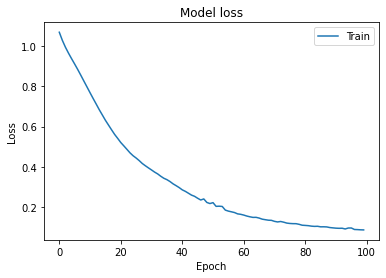

In [120]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

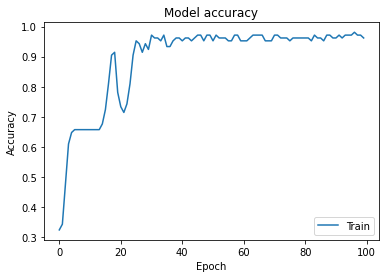

In [121]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# Penggunaan Callbacks

In [123]:
from keras.layers import Dense
df = pd.read_csv('Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [125]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0713 - accuracy: 0.4190
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0534 - accuracy: 0.4952
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0383 - accuracy: 0.5143
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0233 - accuracy: 0.5238
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0080 - accuracy: 0.5619
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9910 - accuracy: 0.5714
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9728 - accuracy: 0.5905
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.6476
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9321 - accuracy: 0.7714
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9095 - accuracy: 0.8667
Epoch 11/50
4/4 [======================